<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch6_4~5_pg_396~408_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch6. 4 ~ 5 pg. 396 ~ 408 필사

## CH06.04. SVD(Singular Value Decomposition)

### SVD 개요(=특이값 분해)
: PCA와 유사한 행렬 분해 기법 이용
- 정방행렬만을 고유벡터로 분해할 수 있는 PCA와 다르게, SVD는 정방 행렬뿐만 아니라 행과 열의 크기가 다른 핸렬에도 적용 가능


**SVD의 매커니즘**
: SVD : m*n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미

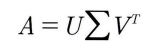
- 행렬 U, V에 속한 벡터 : 특이 벡터(singular vector)
 - 모든 특이 벡터 : 서로 직교하는 성질 가짐
- Σ : 대각행렬, 행렬의 대각에 위치한 값만 0이 아니고, 나머지 위치의 값은 모두 0
 - Σ이 위치한 0이 아닌 값 = 행렬 A의 특이값

- A의 차원이 m * n일 때, U의 차원이 m * m, Σ의 차원이 m * n, V^T 차원이 n * n으로 분해함
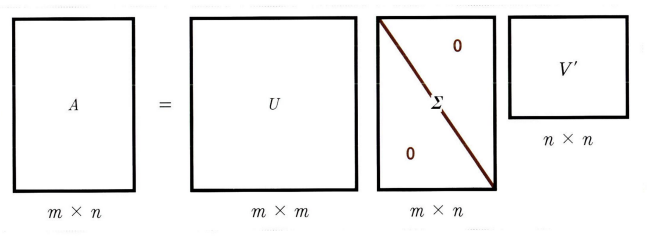





- But, 일반적으로 Σ의 비대각인 부분과 대각 원소 중에 특이값이 0인 부분도 모두 제거 후,
제거된 Σ에 대응되는 U, V 원소도 함께 제거해 차원을 줄인 형태로 SVD 적용

- 즉, A의 차원이 m * n 일 때, U의 차원을 m*p, Σ의 차원을 p * p, V^T의 차원을 p * n으로 분해함

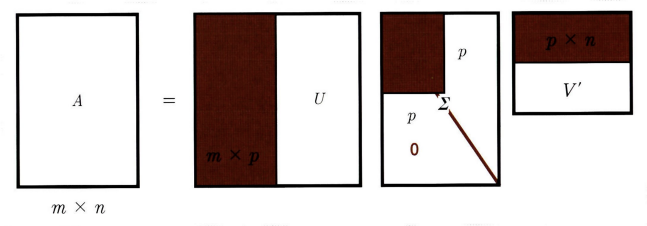

- **Truncated SVD** : Σ의 대각 원소 중 상위 몇 개만 추출하여 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것


일반적인 SVD : 보통 넘파이와 사이파이 라이브러리를 이용해 수행
- 사이파이의 SVD : scipy.linalg.svd 이용

#### 넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD 분해가 어떤 식으로 되는지 간단한 예제를 통해 살펴보기

1. 넘파이 SVD 모듈인 numpy.linalg.svd 로딩 후 랜덤한 4*4 넘파이 행렬 생성하기
 - 랜덤 행렬 생성 < 행렬의 개별 로우끼리의 의존성을 없애기 위해

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


2. 이렇게 생성된 a 행렬에 SVD 적용해 U, Sigma, Vt 도출하기
- SVD 분해 : numpy.linalg.svd(원본 행렬) > U 행렬, Sigma 행렬, V 전치 행렬 반환하기
- Sigma 행렬 = Σ행렬 : 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0 > 0이 아닌 값의 경우만 1차원 행렬로 표현하기

In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


> 결과 : U행렬 : (4, 4) / Sigma행렬 : (4,) / Vt행렬 : (4, 4)


3. 분해된 U, Sigma, Vt, 이용해 다시 원본 행렬로 정확히 복원되는지 확인하기
- 원본 행렬로의 복원 : U, Sigma, Vt 내적하기
- Sigma행렬 : 0이 아닌 값만 1차원으로 추출했음 > 다시 0을 포함한 대칭행렬로 변환 뒤에 내적 수행해야 함

In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


> 결과 : a_ : 원본 행렬 a와 동일하게 복원됨


4. 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기
- 의존성 부여 위해 a 행렬 3번째 로우 : 첫 번째 로우 + 두 번째 로우로 업데이트 / 4번째 로우 : 첫 번째 로우와 같게 업데이트

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


5. 로우 간 관계가 매우 높아진 a 행렬 데이터를 SVD로 다시 분해하기

In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


> 결과 : 이전과 차원을 같지만, SIngma 값 중 2개가 0으로 변함 = 선형 독립인 로우 벡터의 개수가 2개(행렬의 Rank=2)라는 의미



6. 이렇게 분해된 U, Sigma, vt 이용해 다시 원본 행렬로 복원해보기
- U, Sigma, Vt의 전체 데이터 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt 데이터 제외하고 복원하기
- 즉, Sigma의 경우 앞의 2개 요소만 0 x > U 행렬 중 선행 두 개의 열만 추출 / Vt의 경우 선형 두 개의 행만 추출해 복원하기

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[: ,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD 이용해 행렬 분해하기
- Truncated SVD : Σ 행렬에 있는 대각원소 = 특이 값 중 상위 일부 데이터만 추출해 분해하는 방식
 - 인위적으로 더 작은 차원의 U, Σ, V^T로 분해 > 원본 행렬 정확하게 다시 복원 불가
 - But, 상당한 수준으로 원본 행렬 근사 가능 (원래 차원 차수에 가깝게 잘라낼수록(Truncate), 원본 행렬에 더 가깜게 복원 가능


1. Truncated SVD를 사이파이 모듈 이용해 간단히 테스트해보기
 - Truncated SVD : 넘파이 X, 사이파이에서만 지원됨 - scipy.sparse.linalg.svds
- 임의의 원본 행렬 6*6을 Normal SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내 특이값, Truncated SVD로 분해된 행렬의 내적 계산하여 다시 복원된 데이터와 원본 데이터 비교하기

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma,  Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)   # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

> 결과 
- 6 * 6 행렬 SVD 분해 결과 : (6, 6) (6,) (6, 6)
- Truncated SVD의 n_components 4로 설정 > (6, 4) (4,) (4, 6)로 분해됨 
- 복원 행렬 : 완벅하게 복원되지 않고 근사적으로 복원됨

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 사이킷런의 TruncatedSVD 클래스 
: 사이파이 svds와 달리 Truncated SVD 연산 수행 후 원본 행렬 분해한 U, Sigma, Vt 행렬 반환 X
 - PCA 클래스와 유사하게 fit(), transform() 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원 축소해 변환함
 - 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성함


1. 붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환하기

Text(0, 0.5, 'TruncatedSVD Component 2')

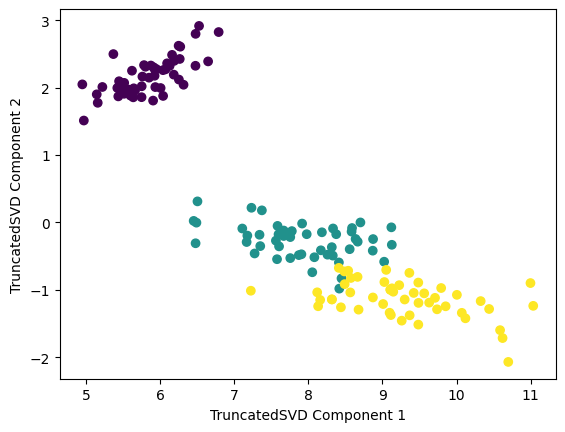

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:, 1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

> 결과 : TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성 가지고 있음

2. 붓꽃 데이터를 스케일링 변환 후 TruncatedSVD와 PCA 클래스 변환 시 두 개가 거의 동일함 확인하기
- 사이킷런의 TruncatedSVD와 PCA 클래스 모두 SVD 이용해 행렬 분해함

Text(0.5, 1.0, 'PCA Transformed')

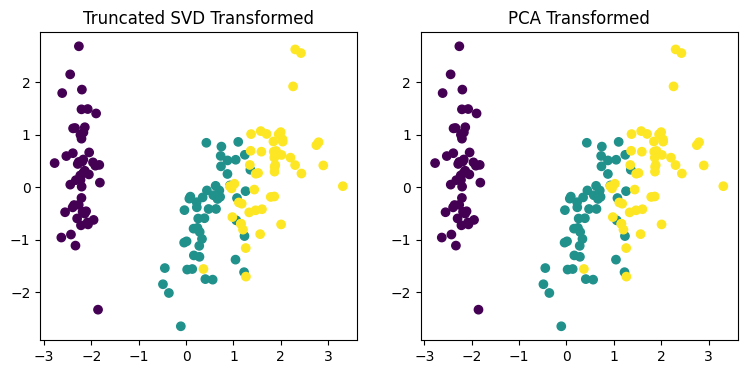

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y = iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y = iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

3. 두개의 변환 행렬 값과 원본 속성별 컴포넌트 비율 값을 실제로 비교해보기

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


> 결과 : 2개의 변환 서로 거의 동일(둘 모두 0에 가까운 값)
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면, 사이킷런의 SVD와 PCA는 동일한 변환 수행한다 = PCA가 SVD 알고리즘으로 구현됨
- But, PCA : 밀집 행렬(Dense Matrix) 변환만 가능 vs SVD : 밀집 행렬 + 희소 행렬(Sparse Matrix)에 대한 변환도 가능


SVD : PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용 + 텍스트의 토픽 모델링 기법-LSA(Latent Semantic Analysis)의 기반 알고리즘

## CH06.05. NMF(Non-Negative Matrix Factorization)

### NMF 개요
: 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 아래와 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
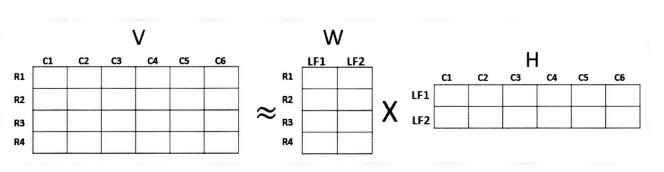

#### 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화하기

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

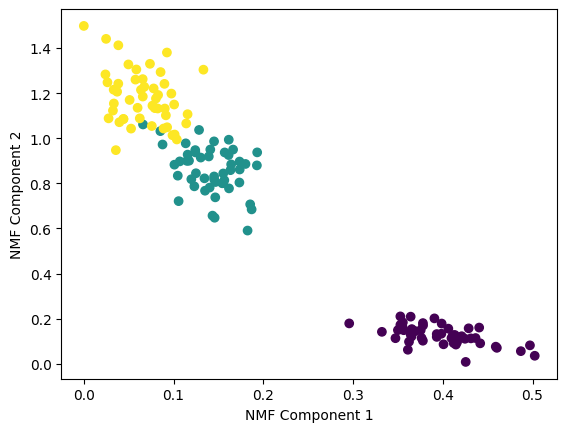

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')